# Relatório de Análise VIII

## Identificando e Removendo Outliers

In [1]:
# para usar no jupyter
# %matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14, 6))

In [2]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')

<img src="Box-Plot.png" width=70%>

<Axes: >

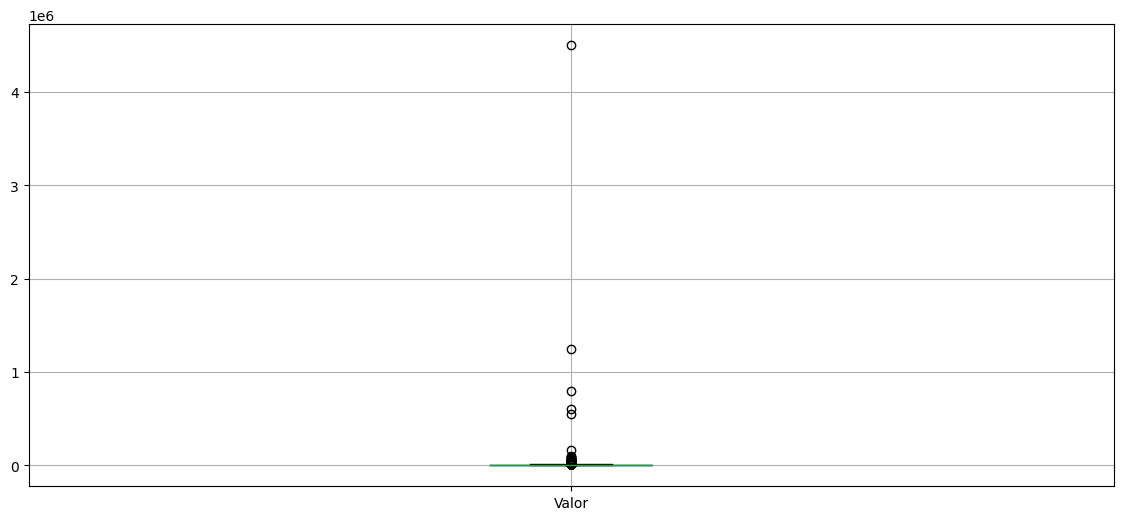

In [3]:
dados.boxplot(['Valor'])

In [4]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
7894,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
11013,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,NaN,4907.98,Casa
13099,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
14325,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
16056,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,NaN,15000.00,Apartamento


In [5]:
valor = dados['Valor']

In [6]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [7]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

In [8]:
dados_new.boxplot(['Valor'])

<Axes: >

In [9]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

array([[<Axes: title={'center': 'Valor'}>]], dtype=object)

In [10]:
dados = pd.read_csv('dados/aluguel_amostra.csv', sep = ';')

In [11]:
dados.boxplot(['Valor'])

<Axes: title={'center': 'Valor'}>

In [12]:
valor = dados['Valor m2']
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

print(Q1)
print(Q3)
print(IIQ)
print(limite_inferior)
print(limite_superior)

21.25
42.31
21.060000000000002
-10.340000000000003
73.9


## Identificando e Removendo Outliers (continuação)

In [13]:
dados.boxplot(['Valor'], by = ['Tipo'])

<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

In [14]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [15]:
type(grupo_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [16]:
grupo_tipo.groups

{'Apartamento': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 29, 30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 46, 47, 48, 49, 51, 52, 55, 56, 58, 59, 60, 61, 62, 63, 64, 66, 68, 70, 73, 75, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 110, 111, 112, 113, 114, 116, 119, 120, 121, ...], 'Casa': [13, 31, 50, 54, 74, 109, 115, 123, 127, 172, 181, 202, 210, 236, 247, 261, 291, 307, 360, 385, 478, 512, 541, 550, 557, 601, 611, 624, 631, 633, 637, 641, 642, 692, 702, 787, 793, 796, 812, 813, 843, 858, 869, 880, 884, 894, 931, 942, 943, 962, 1001, 1014, 1097, 1141, 1155, 1190, 1192, 1278, 1286, 1307, 1325, 1338, 1340, 1371, 1459, 1510, 1538, 1542, 1668, 1675, 1719, 1735, 1741, 1769, 1783, 1800, 1878, 1897, 1926, 1929, 1951, 1960, 1972, 1976, 2035, 2096, 2112, 2117, 2122, 2213, 2240, 2253, 2267, 2292, 2329, 2332, 2373, 2405, 2459, 2486, ...], 'Casa de 

In [17]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [18]:
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    3925.0
Casa de Vila           800.0
Quitinete              900.0
Name: Valor, dtype: float64

In [19]:
Q3

Tipo
Apartamento            5000.0
Casa                   9000.0
Casa de Condomínio    16000.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [20]:
IIQ

Tipo
Apartamento            3300.0
Casa                   7900.0
Casa de Condomínio    12075.0
Casa de Vila           1000.0
Quitinete               600.0
Name: Valor, dtype: float64

In [21]:
limite_inferior

Tipo
Apartamento           -3250.0
Casa                 -10750.0
Casa de Condomínio   -14187.5
Casa de Vila           -700.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [22]:
limite_superior

Tipo
Apartamento            9950.0
Casa                  20850.0
Casa de Condomínio    34112.5
Casa de Vila           3300.0
Quitinete              2400.0
Name: Valor, dtype: float64

In [23]:
limite_superior['Casa']

20850.0

In [24]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

In [25]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

In [26]:
dados_new.to_csv('dados/aluguel_residencial_sem_outliers.csv', sep = ';', index = False)